In [1]:
import pandas as pd
import numpy as np

In [3]:
#Import Raw Data

Data = pd.read_csv('NYC_Wi-Fi_Hotspot_Locations.csv')

In [5]:
#QC the first 5 rows

pd.set_option('display.max_columns', None)
Data.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,Location_T,Remarks,City,SSID,SourceID,Activated,BoroCode,Borough Name,Neighborhood Tabulation Area Code (NTACODE),Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.892077,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,09/09/9999,4,Queens,QN02,Springfield Gardens North,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)"
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.217755,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,09/09/9999,4,Queens,QN22,Flushing,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)"
2,12370,3,Free,Transit Wireless,Grand St (L),Grand St (L),40.711926,-73.940670,1.000698e+06,198655.908840,Subway Station,SN 123,Brooklyn,TransitWirelessWiFi,NaN,09/09/9999,3,Brooklyn,BK90,East Williamsburg,34,11206,301,495,495,0,0,1699,"(40.7119259997, -73.9406699994)"
3,9893,3,Free,Downtown Brooklyn,NaN,125 Court St.,40.689985,-73.991995,9.864700e+05,190656.680416,Outdoor,NaN,Brooklyn,Downtown Brooklyn WiFi,NaN,09/09/9999,3,Brooklyn,BK09,Brooklyn Heights-Cobble Hill,33,11201,302,9,9,3388736,3002777501,298,"(40.6899850001, -73.9919950004)"
4,10169,1,Free,Transit Wireless,Lexington Av-63 St (F),Lexington Av-63 St (F),40.764630,-73.966115,9.936366e+05,217853.888161,Subway Station,SN 223,New York,TransitWirelessWiFi,NaN,09/09/9999,1,Manhattan,MN40,Upper East Side-Carnegie Hill,4,10065,108,120,120,0,0,599,"(40.7646300002, -73.9661150001)"


<font size="3">Question 1: How many unique providers are there?</font>

In [103]:
list(Data['Provider'].unique())

['SPECTRUM',
 'Transit Wireless',
 'Downtown Brooklyn',
 'Harlem',
 'BPL',
 'ALTICEUSA',
 'Fiberless',
 'LinkNYC - Citybridge',
 'Manhattan Down Alliance',
 'AT&T',
 'NYPL',
 'NYCHA',
 'Chelsea',
 'QPL',
 'City Tech',
 'Spot On Networks',
 'Partner']

In [23]:
# Total number of provider from the list above

len(list(Data['Provider'].unique()))

17

<font size="3">Question 2: How many WiFi hotspots are there by the second most common provider in the Bronx?</font>

In [44]:
#Filter the data of provider and only in Bronx

Data_Provider_Boro = Data[['Provider', 'Borough Name']][Data['Borough Name'] == 'Bronx']
Data_Provider_Boro

,Provider,Borough Name
10,ALTICEUSA,Bronx
38,LinkNYC - Citybridge,Bronx
49,ALTICEUSA,Bronx
57,LinkNYC - Citybridge,Bronx
65,LinkNYC - Citybridge,Bronx
...,...,...
3252,LinkNYC - Citybridge,Bronx
3273,ALTICEUSA,Bronx
3304,ALTICEUSA,Bronx
3305,ALTICEUSA,Bronx


In [52]:
#Extract the provider count and sort it in descending order

Data_Provider_Boro.groupby('Provider').count().sort_values('Borough Name', ascending=False)

,Borough Name
Provider,
LinkNYC - Citybridge,137
ALTICEUSA,120
NYPL,35
Transit Wireless,21
AT&T,3


In [ ]:
# The answer is ALTICEUSA	120

<font size="3">Question 3: What fraction of WiFi hotspots are in parks? For simplicity, you can consider a park a place where the name of the location where the WiFi is located contains the word "park".</font>

In [65]:
# Replace empty name with "None" for calculation convenience

Data['Name'].fillna('None',inplace = True)

In [395]:
Faction_of_park = Data[Data['Name'].str.contains('(?i)park')].shape[0]/Data.shape[0]

In [396]:
Faction_of_park

0.12051822838204278

<font size="3">Question 4: What is the probability that a WiFi hotspot is free (without any limitations) given that it's not in a library? For this question, pull the location data based on the "Location_T" field.</font>

In [398]:
frac_free_hotsot = Data[Data['Location_T'] != 'Library'][Data['Type']=='Free'].shape[0]/Data[Data['Location_T'] != 'Library'].shape[0

C:\Users\pzhen\Machine_Learning\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [399]:
frac_free_hotsot

0.8122383252818035

<font size="3">Question 5: How are WiFi hotspots distributed across neighborhoods? For this question, calculate the number of WiFi hotspots per capita for each Neighborhood Tabulation Area (NTA). Exclude NTAs with less than 30 reported WiFi hotspots. Report the interquartile range of the averages.
For population data for each NTA, use this dataset; information on the dataset is found here. Use the population data for the column corresponding to 2010.</font>

In [124]:
#Inport the demographic data at NTA

Data_popu = pd.read_csv('Census_Demographics_at_the_Neighborhood_Tabulation_Area__NTA__level.csv')

In [125]:
Data_popu.head(5)

,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Name,Total Population 2000 Number,Total Population 2010 Number,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent
0,Bronx,5.0,BX01,Claremont-Bathgate,28149.0,31078.0,2929.0,10.4
1,Bronx,5.0,BX03,Eastchester-Edenwald-Baychester,35422.0,34517.0,-905.0,-2.6
2,Bronx,5.0,BX05,Bedford Park-Fordham North,55329.0,54415.0,-914.0,-1.7
3,Bronx,5.0,BX06,Belmont,25967.0,27378.0,1411.0,5.4
4,Bronx,5.0,BX07,Bronxdale,34309.0,35538.0,1229.0,3.6


In [177]:
#Count the number of hotspots groupy by NTA

Data_hotspot_NTA = Data["Neighborhood Tabulation Area Code (NTACODE)"].value_counts()
Data_hotspot_NTA

MN17    160
MN13    156
MN12    143
BK38    125
MN19    111
       ... 
SI11      1
QN48      1
QN34      1
QN57      1
BK43      1
Name: Neighborhood Tabulation Area Code (NTACODE), Length: 178, dtype: int64

In [203]:
# Reomove the NTA with hotspots number smaller than 30 and set the NTA code as index

Data_hotspot_NTA = pd.DataFrame(Data_hotspot_NTA[Data_hotspot_NTA>=30]).rename(columns={'Neighborhood Tabulation Area Code (NTACODE)':'hotspot_num'})
Data_hotspot_NTA.index.name ='NTA_CODE'
Data_hotspot_NTA

,hotspot_num
NTA_CODE,
MN17,160
MN13,156
MN12,143
BK38,125
MN19,111
MN03,101
MN20,82
MN11,69
MN34,65


In [204]:
# Extract the NTA code along with the corresponding population

Data_popu_NTA = Data_popu[["Geographic Area - Neighborhood Tabulation Area (NTA)* Code","Total Population 2010 Number"]].set_index("Geographic Area - Neighborhood Tabulation Area (NTA)* Code")
Data_popu_NTA.index.name = 'NTA_CODE'
Data_popu_NTA

,Total Population 2010 Number
NTA_CODE,
BX01,31078.0
BX03,34517.0
BX05,54415.0
BX06,27378.0
BX07,35538.0
...,...
SI48,25238.0
SI54,40720.0
SI99,0.0


In [205]:
# Join the table of the hotspot number of NTA and population of NTA by NTA code 
Data_hotspot_popu_NTA = pd.merge(Data_hotspot_NTA,Data_popu_NTA, on = 'NTA_CODE', how = 'left')

In [207]:
# Calculate the hotspot by capita of NTA

Data_hotspot_popu_NTA['hotspot_num_per_cap'] = Data_hotspot_popu_NTA['hotspot_num']/Data_hotspot_popu_NTA['Total Population 2010 Number']

In [208]:
Data_hotspot_popu_NTA

,hotspot_num,Total Population 2010 Number,hotspot_num_per_cap
NTA_CODE,,,
MN17,160,28630.0,0.005589
MN13,156,70150.0,0.002224
MN12,143,132378.0,0.001080
BK38,125,34495.0,0.003624
MN19,111,51231.0,0.002167
MN03,101,75282.0,0.001342
MN20,82,50742.0,0.001616
MN11,69,43383.0,0.001590
MN34,65,58019.0,0.001120


In [213]:
# Get the statistics of the hostspot number per captital including the 0.25 and 0.75 percentile

Data_hotspot_popu_NTA.describe(percentiles =  [0.25,0.75])

,hotspot_num,Total Population 2010 Number,hotspot_num_per_cap
count,34.000000,34.000000,34.000000
mean,63.764706,55538.176471,0.002447
std,35.345103,26644.958730,0.004822
min,30.000000,1849.000000,0.000358
25%,42.500000,40459.750000,0.000759
50%,52.000000,51822.000000,0.001049
75%,64.500000,69524.750000,0.001610
max,160.000000,132378.000000,0.023797


In [214]:
# Calculate the difference between the two percentile

0.001610 - 0.000759

0.0008510000000000001

<font size="3">Question 6: How far must one travel from one hotspot to another? For this question, report the median distance, in feet, of the average distance between each hotspot to the nearest 3 hotspots. For your distance calculation, calculate the distance "as the crow flies". For simplicity, please use the spherical Earth projected to a plane equation for calculating distances. Use the radius of the Earth as 6371 km. Remember, report your answer in feet.</font>

In [350]:
from scipy import spatial

In [359]:
#Extract the coordinates of the hotspots and put them in a list

cords = [(Data['X'].iloc[n], Data['Y'].iloc[n]) for n in range(len(Data))]

In [363]:
#Employ k nearkest neighbors

tree = spatial.KDTree(cords)

In [382]:
#Caculate the 3 nearest points (calucte 4 nearest in the code since it include the own coordinates) and divided by 3 to get the 
#average distance for each hot spot

Data['avg_nearest_dist'] = [tree.query([(Data['X'].iloc[n], Data['Y'].iloc[n])],k=4)[0].sum()/3 for n in range(len(Data))]

In [388]:
#Extract the median:

Data['avg_nearest_dist'].median()

276.5192111873182

In [389]:
#Convert the distance into feet

Data['avg_nearest_dist'].median()*3937/1200

907.2134453703931

<font size="3">Question 7: The dataset contains information on the date the hotspot was activated. What fraction of all activations occurred on the day of week that had the most activations? In other words, if Monday had the most activations, what fraction of activations occurred on Monday? Note: there are some dates that don't make sense. Ignore them for the analysis.</font>

In [262]:
# Convert the date to proper format and remove nonsense dates

Data_active = pd.DataFrame(pd.to_datetime(Data['Activated'][Data['Activated'].str.split('/').str[-1] != '9999']))

In [266]:
# Create day of the week attributes for each date

Data_active['dayofweek'] = Data_active['Activated'].dt.day_name()

In [267]:
Data_active

,Activated,dayofweek
13,2018-01-05,Friday
14,2017-07-25,Tuesday
15,2017-02-28,Tuesday
17,2017-11-07,Tuesday
19,2017-10-06,Friday
...,...,...
3310,2017-04-14,Friday
3315,2018-04-20,Friday
3316,2017-08-02,Wednesday
3317,2018-05-11,Friday


In [271]:
# Count the activation by day of week

Data_active_day = Data_active.groupby('dayofweek').count()
Data_active_day

,Activated
dayofweek,
Friday,374
Monday,279
Saturday,1
Sunday,3
Thursday,380
Tuesday,341
Wednesday,444


In [278]:
# Calculate the fraction for Monday

Frac_Monday_Active = Data_active_day['Activated'][Data_active_day.index == 'Monday']/Data_active_day['Activated'].sum()
Frac_Monday_Active['Monday']

0.1531284302963776

<font size="3">Question 8: If you plot the number of hotspot activations for each month, you'll notice a general increase but then a precipitous drop after June 2018. Using a linear estimate for the number of monthly activations, what is rate of increase in monthly activations? Only consider data before July 1, 2018 and set the start date as the earliest date of the data. If you need to, use 30.5 days in a month.</font>

In [299]:
#Count the number of activated hotspot for each date

Data_active_time = Data_active[Data_active['Activated']<= '2018-07-01'].sort_values(by = 'Activated').groupby('Activated').count().rename(columns = {'dayofweek':'num_activated'})
Data_active_time

,num_activated
Activated,
2016-01-19,4
2016-01-26,2
2016-01-27,5
2016-02-01,4
2016-02-19,4
...,...
2018-06-20,2
2018-06-25,4
2018-06-26,3


In [308]:
#Calculate the running sum of activation number by dates

Data_active_time['num_cumsum'] = Data_active_time['num_activated'].cumsum() 

In [309]:
Data_active_time

,num_activated,num_cumsum
Activated,,
2016-01-19,4,4
2016-01-26,2,6
2016-01-27,5,11
2016-02-01,4,15
2016-02-19,4,19
...,...,...
2018-06-20,2,1698
2018-06-25,4,1702
2018-06-26,3,1705


In [310]:
from matplotlib import pyplot as plt

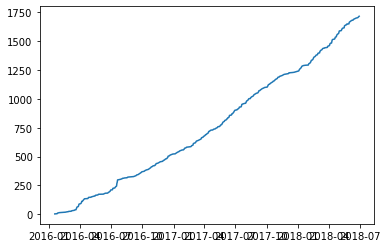

In [311]:
# Plot the running sum to QC the trend. Seems linear

plt.plot(Data_active_time.index,Data_active_time['num_cumsum'])
plt.show()

In [317]:
import numpy as np

In [336]:
#Resample the activation number by month. Extract the month index and the running sum average

Month = list(((Data_active_time.resample('BM').mean().index -  Data_active_time.resample('BM').mean().index[0])/np.timedelta64(1, 'M')))
Month_cumsum = Data_active_time.resample('BM').mean()['num_cumsum']

In [342]:
# Linear fit

fit = np.polyfit(Month, Month_cumsum,1)
fit_fn = np.poly1d(fit)

In [344]:
# QC the linear fit parameter. The slope is the increment by month

fit_fn

poly1d([  58.35053519, -102.78404247])

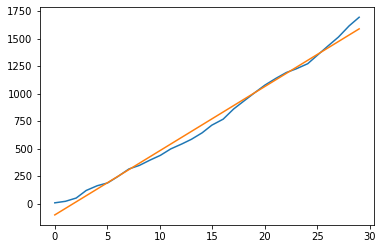

In [343]:
#Plot linear fit results against the data

plt.plot(Month, Data_active_time.resample('BM').mean()['num_cumsum'])
plt.plot(Month,fit_fn(Month))
plt.show()

In [349]:
#Another way to calculate the increment: Use the change of the activated hotspot devided by month span. 
#The result is similar to the linear fit result

1710/((Data_active_time.index[-1] -  Data_active_time.index[0])/np.timedelta64(1, 'M'))

58.3487177690583